<a href="https://colab.research.google.com/github/cxavier6/procon-sindec2016/blob/main/PROCONS_Sindec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados de Reclamações Fundamentadas dos PROCONS-Sindec**

O Sistema Nacional de Informações de Defesa do Consumidor – Sindec é um sistema
informatizado que integra processos e procedimentos, relativos ao atendimento aos
consumidores nos Procons, visando proporcionar um instrumento de gestão adequado ao
dinamismo que é típico de seus setores de atendimento.

O PROCON é um órgão de Proteção e Defesa do Consumidor que opera em todo o território nacional. É o órgão conhecido por receber reclamações dos consumidores e desempanha processos administrativos para apurar e punir más práticas das organizações.

Entre suas principais funções, o PROCON é responsável por:


*   Abrir processos solicitando explicações das empresas sobre suas práticas, mediante a solicitação do consumidor.
*   Realizar fiscalizações e estabelecer sanções, como multas.
* Prover atendimento individual para esclarecer dúvidas sobre casos e problemas reais do consumidor.
* Promover diálogo entre as partes consumidor/empresa.

De todas as demandas registradas no sistema, somente uma parcela é tratada por
meio de processos administrativos (Reclamações), já que a maior parte dos Procons
utiliza-se preponderantemente de tipos de atendimento mais céleres para resolução dos
problemas enfrentados pelos consumidores. Logo, de um modo geral, são registradas na forma de Reclamação demandas de
consumidores que necessitam da realização de audiência para tentativa de resolução, o
que pode acontecer tanto pela complexidade da demanda quanto pelo tipo de postura
adotada pelo fornecedor no enfrentamento do conflito (SINDEC, 2013).




#Obtenção dos dados

Os dados utilizados para este estudo estão disponíveis no Portal Brasileiro de Dados Abertos no seguinte [link](https://dados.gov.br/dataset/cadastro-nacional-de-reclamacoes-fundamentadas-procons-sindec1) e são referentes a reclamações finalizadas pelos Procons Integrados ao Sindec, no período
de 12 meses do ano de 2016.



In [1]:

# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# definindo o estilo dos gráficos
sns.set_style()

In [2]:
df = pd.read_csv("/content/reclamacoes-fundamentadas-sindec-2016.csv")

Após importar as bibliotecas necessárias, inicia-se a análise dos dados.

A função `head()` mostra as 5 primeiras linhas do dataframe.

In [3]:
df.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2016,2016-02-17 13:43:08.000,2015-10-29 10:59:59.000,2,Nordeste,PE,CVC BRASIL OPERADORA E AGENCIA DE VIAGENS S.A.,CVC,1,1.076026e+13,10760260.0,CVC BRASIL OPERADORA E AGENCIA DE VIAGENS S.A.,NaN,7911200.0,AGÊNCIAS DE VIAGENS,S,276,Agências e Operadoras de viagens (pacotes turí...,205.0,"Consulta Sobre Serviços (Pesquisa, cartilha, e...",M,entre 61 a 70 anos,52061540.0
1,2016,2016-12-15 18:11:35.000,2016-11-18 14:52:22.000,2,Nordeste,PE,GIORGIO ARMANI BRASIL COMERCIO,EMPORIO ARMANI,1,1.318050e+13,13180502.0,NaN,NaN,NaN,NaN,N,132,Vestuário ( Calçado / Roupa ),105.0,Produto com vício,F,entre 31 a 40 anos,51010140.0
2,2016,2016-09-16 09:01:46.000,2016-06-29 13:58:35.000,2,Nordeste,PE,COMPANHIA ENERGETICA DE PERNAMBUCO,CELPE,1,1.083593e+13,10835932.0,COMPANHIA ENERGETICA DE PERNAMBUCO,CELPE,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,S,185,Energia Elétrica,134.0,Cobrança indevida/abusiva,F,entre 51 a 60 anos,53060600.0
3,2016,2016-02-18 13:30:30.000,2016-01-21 12:23:51.000,2,Nordeste,PE,MOURA DUBEUX,MOURA DUBEUX,1,1.204963e+13,12049631.0,MOURA DUBEUX ENGENHARIA S/A,NaN,4120400.0,CONSTRUÇÃO DE EDIFÍCIOS,S,82,Incorporação ( Construtoras e Incorporadoras ),88.0,Não entrega do contrato,M,entre 51 a 60 anos,53090220.0
4,2016,2016-11-09 14:20:36.000,2016-10-07 16:39:59.000,2,Nordeste,PE,ASSOCIAÇÃO UNIFICADA PAULISTA DE ENSINO RENOVADO,UNIP,1,NaN,NaN,NaN,NaN,NaN,NaN,S,233,"Escola ( Pré, 1º, 2º Graus e Superior )",199.0,"Documentos: não fornecimento (escolares, recib...",F,entre 21 a 30 anos,53437100.0


###Dicionário de variáveis

* `AnoCalendario` - Ano calendário de publicação do cadastro de reclamações fundamentadas

* `DataArquivamento` - Data de arquivamento das reclamações

* `DataAbertura` - Data de abertura das reclamações

* `CodigoRegiao` - Código identificador da região do Procon: 01 - Norte, 02 - Nordeste, 03 - Sudeste, 04 - Sul, 05 - Centro-Oeste

* `Regiao` - Região do Procon

* `UF` - Unidade da Federeção do Procon

* `strRazaoSocial` - Razão social do fornecedor (empresa) na base de dados do Sindec

* `strNomeFantasia` - Nome fantasia do fornecedor na base de dados do Sindec (nome comercial / popular / fachada)

* `Tipo` - Cpodigo identificador do tipo da pessoa: 1 - Pessoa Jurídica (CNPJ), 0 - Pessoa Física (CPF)

* `NumeroCNPJ` - Número do CNPJ - Cadastro Nacional de
Pessoa Jurídica ou CPF - Cadastro de
Pessoa Física

* `RadicalCNPJ` - Aplica-se para pessoa jurídica e serve
para agrupar as informações de um
mesmo fornecedor (matriz e filiais), sendo
os oitos primeiros dígitos do número do
CNPJ - Exemplo: a matriz (central) do
banco e suas filiais (agências)

* `RazaoSocialRFB` - Razão social do fornecedor na base de
dados da RFB – Receita Federal do Brasil.
Obs.: somente para os CNPJs
(NumeroCNPJ) válidos na base da RFB

* `NomeFantasiaRFB` - Nome fantasia do fornecedor na base de
dados da RFB – Receita Federal do Brasil
Obs.: somente para os CNPJs
(NumeroCNPJ) válidos na base da RFB

* `CNAEPrincipal` - Código identificador da Classificação
Nacional de Atividades Econômicas
principal do fornecedor.
Obs.: somente para os CNPJs
(NumeroCNPJ) válidos na base da RFB

* `DescCNAEPrincipal`  - Descrição da Classificação Nacional de
Atividades Econômicas principal do
fornecedor. Obs.: somente para os CNPJs
(NumeroCNPJ) válidos na base da RFB

* `Atendida` - Código identificador da reclamação
fundamentada atendida ou não pela
empresa/fornecedor:
S – Atendida
N – NÃO Atendida

* `CodigoAssunto` - Código identificador do assunto

* `DescricaoAssunto` - Descrição dos assuntos do Sindec
(produto ou serviço objeto da reclamação)

* `CodigoProblema` - Código identificador do problema

* `DescricaoProblema` - Descrição dos problemas do Sindec
(especificação da lesão sofrida pelo
consumidor)

* `SexoConsumidor` - Código identificador do sexo do
consumidor:
M – Masculino
F – Feminino

* `FaixaEtariaConsumidor` - Faixa etária do consumidor distribuída da
seguinte forma:

      até 20 anos

      entre 21 e 30 anos

      entre 31 e 40 anos

      entre 41 e 50 anos

      entre 51 e 60 anos

      entre 61 e 70 anos

      mais de 70 anos

      Nao Informada (data de nascimento não
      informada no cadastro do consumidor)
      Nao Informada (data de nascimento não
      informada no cadastro do consumidor)

      Não se aplica (são as reclamações (de
      ofício) em que o Procon é o reclamante)

* `CEPConsumidor` - Código identificador do CEP do
consumidor (Código de Endereçamento
Postal). Obs.: Não se aplica (são as
reclamações (de ofício) em que o Procon é
o reclamante)
ofício) em que o Procon é o reclamante)

A função `info()`permite verificar as informações do dataframe e os tipos de variáveis.

Neste caso, possui **71415 entradas e 23 colunas.**

In [5]:
# verificando as informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          203486 non-null  int64  
 1   DataArquivamento       203486 non-null  object 
 2   DataAbertura           203486 non-null  object 
 3   CodigoRegiao           203486 non-null  int64  
 4   Regiao                 203486 non-null  object 
 5   UF                     203486 non-null  object 
 6   strRazaoSocial         203483 non-null  object 
 7   strNomeFantasia        173722 non-null  object 
 8   Tipo                   203486 non-null  int64  
 9   NumeroCNPJ             195292 non-null  float64
 10  RadicalCNPJ            195292 non-null  float64
 11  RazaoSocialRFB         187287 non-null  object 
 12  NomeFantasiaRFB        92561 non-null   object 
 13  CNAEPrincipal          187287 non-null  float64
 14  DescCNAEPrincipal      185784 non-nu

Como lidamos majoritariamente com variáveis categóricas, a partir da função `describe(include = 'O')`é possível retirar alguns insights através da análise estatísticas dos dados, como:
 
* `count` - Contagem de entradas válidas para a variável
* `unique` - Quantidade de entradas únicas
* `top` - Entrada mais comum
* `freq` - Frequência em que a entrada mais comum ocorre
 
Neste conjunto de dados já é possível tirar algumas conclusões:
 
* A região que registrou mais reclamações fundamentadas é o **Nordeste**.
 
* O UF que mais registrou reclamações fundamentadas foi o estado de **São Paulo**.
 
* A empresa, razão social, que mais recebeu reclamações fundamentadas foi a **TELEMAR NORTE LESTE S/A**.
 
* A  empresa, de nome fantasia, que recebeu mais reclamações fundamentadas foi a **OI**.
 
* A descrição do problema mais relatado é **Cobrança indevida/abusiva**.
 
* Ainda é possível correlacionar através dos dados acima que a reclamação mais relatada é **a cobrança abusiva em serviços de telefonia**.
 
* As mulheres registram mais reclamações que os homens.
 
* A faixa etária que mais registrou reclamações foi **entre 31 a 40 anos**.
 
* A maioria das reclamações **foram atendidas**.

In [6]:
df.describe(include='O')

,DataArquivamento,DataAbertura,Regiao,UF,strRazaoSocial,strNomeFantasia,RazaoSocialRFB,NomeFantasiaRFB,DescCNAEPrincipal,Atendida,DescricaoAssunto,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor
count,203486,203486,203486,203486,203483,173722,187287,92561,185784,203486,203486,203476,203484,203486
unique,139419,168275,5,23,34719,26719,19339,12865,748,2,212,187,3,8
top,2016-01-01 00:00:00.000,2012-02-13 11:45:30.000,Nordeste,SP,TELEMAR NORTE LESTE S/A,OI,CLARO S.A.,OI,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,"Telefone ( Convencional, Celular, Interfone, E...",Cobrança indevida/abusiva,F,entre 31 a 40 anos
freq,237,18,66411,31548,2979,2732,4829,11216,16162,120575,21272,52746,107229,45422


Entretanto, as variáveis númericas podem ser analisadas através da função `describe()`, que retorna alguns itens:
* `count` - Contagem de entradas válidas para cada variável
* `mean` - Média aritmética dos valores da variável
* `std` - Desvio padrão
* `min` - Menor valor existente para a variável
* `25%` - Primeiro quartil
* `50%` - Mediana
* `75%` - Terceiro quartil
* `max` - MAior valor existente para a variável

Logo, pode-se afirmar que:
 
* A validade dos dados ocorreram de fato em 2016.
 
* A mediana do `Tipo` próxima a 1 indica que o tipo de pessoa que mais recebeu reclamações é **pessoa jurídica**.

In [7]:
# distribuição estatística das variáveis numéricas
df.describe()

,AnoCalendario,CodigoRegiao,Tipo,NumeroCNPJ,RadicalCNPJ,CNAEPrincipal,CodigoAssunto,CodigoProblema,CEPConsumidor
count,203486.0,203486.00000,203486.000000,1.952920e+05,1.952920e+05,1.872870e+05,203486.000000,203476.000000,1.894000e+05
mean,2016.0,2.89616,0.996614,2.370356e+13,1.169177e+08,5.520086e+06,138.631277,120.828766,5.160439e+07
std,0.0,1.17781,0.058091,2.564529e+13,2.423599e+09,1.608752e+06,69.979777,58.999782,2.684505e+07
min,2016.0,1.00000,0.000000,1.910000e+02,0.000000e+00,1.156000e+05,1.000000,1.000000,0.000000e+00
25%,2016.0,2.00000,1.000000,4.206050e+12,4.206050e+06,4.711301e+06,92.000000,105.000000,3.101010e+07
50%,2016.0,3.00000,1.000000,1.082318e+13,1.083593e+07,6.110801e+06,105.000000,107.000000,5.600000e+07
75%,2016.0,4.00000,1.000000,4.043254e+13,4.043254e+07,6.423900e+06,187.000000,136.000000,7.727000e+07
max,2016.0,5.00000,1.000000,9.840807e+13,9.996934e+10,9.700500e+06,288.000000,262.000000,9.969800e+07


## Análise Exploratória

### Região

Realizando uma análise mais quantitativa na variável de Região através da função `coluna_região.value_counts()`.

A partir do que foi constadado na análise categórica dos dados, a região com mais reclamações registradas é a do **Nordeste** com 66411 reclamações, seguida do **Sudeste** com 62974, **Centro-oeste** com 28786, **Sul** com 26113, e a região com menos reclamações é o **Norte** com 19202 .

In [8]:
coluna_regiao = df['Regiao']

In [9]:
coluna_regiao.value_counts()

Nordeste        66411
Sudeste         62974
Centro-oeste    28786
Sul             26113
Norte           19202
Name: Regiao, dtype: int64

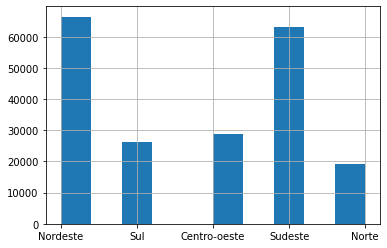

In [10]:
# histograma reclamações por região
coluna_regiao.hist()

### Proporção entre o sexo feminino e masculino

O maior índice de reclamações é do sexo **feminino**, com **12783 reclamações** a mais que o sexo masculino.

O código N com 1809 reclamções indica que o PROCON é o reclamante. 



In [12]:
coluna_sexo = df['SexoConsumidor']

In [13]:
coluna_sexo.value_counts()

F    107229
M     94446
N      1809
Name: SexoConsumidor, dtype: int64

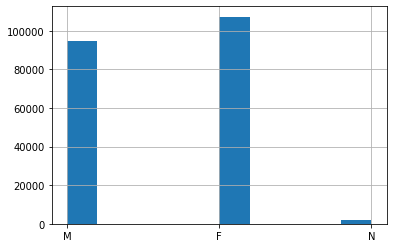

In [14]:
# histograma reclamações por sexo
coluna_sexo.hist()

### Proporção Pessoa Física e Pessoa Jurídica

As reclamações fundamentadas são majoritariamente para **Pessoa Jurídica** com `tipo 1`.

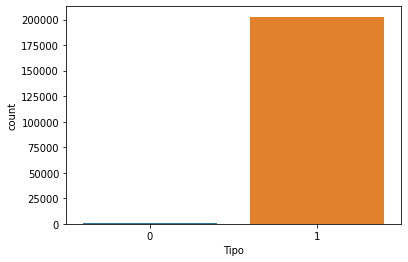

In [15]:
# tipo pessoa física ou pessoa jurídica
sns.countplot(x='Tipo', data=df);

### Descrição do Problema

Dos mais variados problemas relatados pelo consumidor, os principais foram:

* cobrança indevida/abusiva

* produto com vício

* garantia (abrangência, cobertura, etc.)

E os problemas com menos registros foram:

* documentos: não fornecimento (escolares, recibo, nota fiscal, voucher, etc.)

* não cumprimento à oferta

* antecipação de financiamento

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


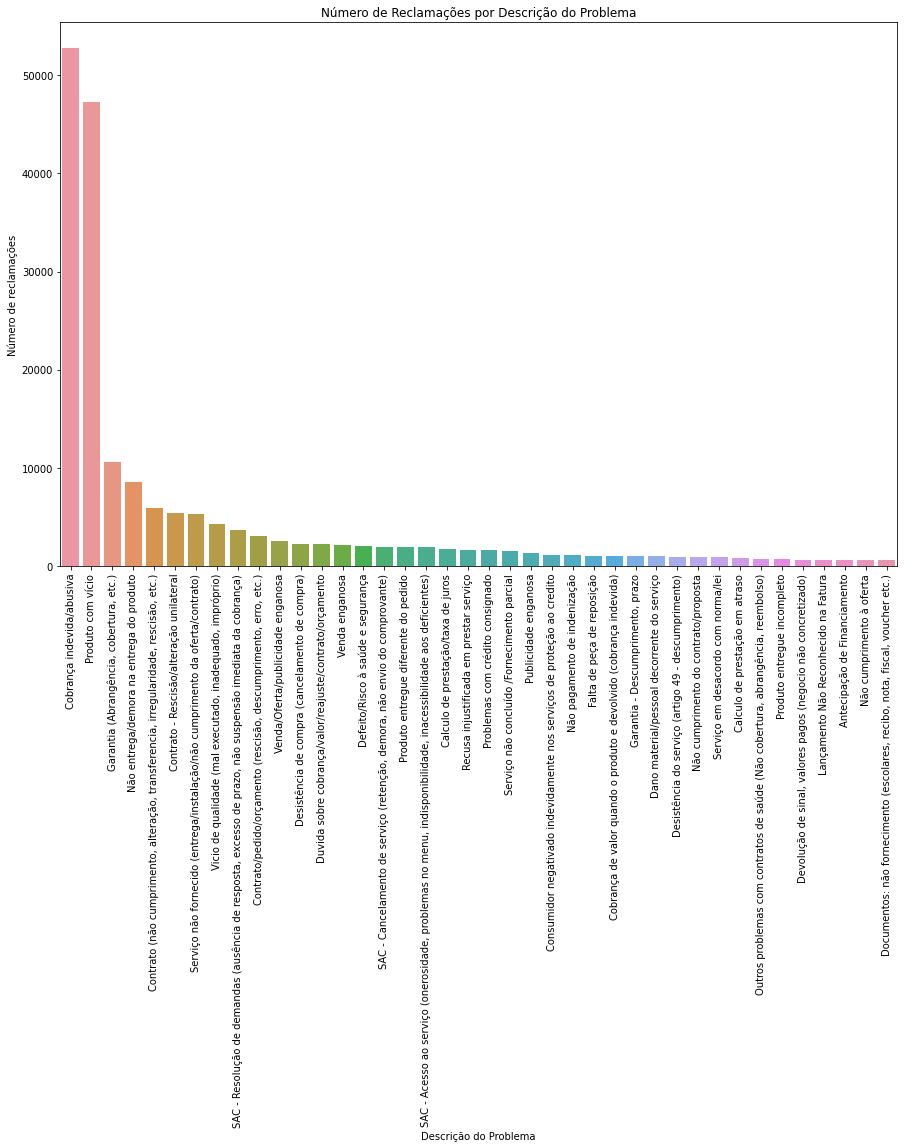

In [16]:
# coletando e ordenando os valores para cada descrição do problema
DescricaoProblema = df['DescricaoProblema']
DescricaoProblema = df.DescricaoProblema.value_counts().sort_values(ascending=False).iloc[0:40]

# criando a visualização
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(DescricaoProblema.index, DescricaoProblema.values);

# definindo o título do eixo y
plt.ylabel('Número de reclamações')
# definindo o título do eixo x
plt.xlabel('Descrição do Problema')
# definindo o título da visualização
plt.title('Número de Reclamações por Descrição do Problema')
# rotacionando a legenda do eixo x para melhor visualização
plt.xticks(rotation=90);
# plotando a visualização
plt.show()

### Empresas (Nome Fantasia)

Através da função `coluna_empresa.value_counts()` verifica-se que existem mais de 26719 entradas, ou seja, mais de **26 mil** empresas diferentes foram relatadas ao PROCON em todo o Brasil.

Dentre essas, as que mais receberam reclamações foram:

* OI

* SKY

* SAMSUNG

* PONTOFRIO.COM.BR/ CASASBAHIA.COM.BR/ EXTRA.COM.BR

* OI FIXO

In [17]:
coluna_empresa = df['strNomeFantasia']

In [18]:
coluna_empresa.value_counts()

OI                                                 2732
SKY                                                2615
SAMSUNG                                            2127
PONTOFRIO.COM.BR/CASASBAHIA.COM.BR/EXTRA.COM.BR    2106
OI FIXO                                            2080
                                                   ... 
TWT PISCINAS E AQUECEDORES                            1
SAGE EVENTOS                                          1
HOTELBARAOGERALDO.COM.BR                              1
WAP LAVADORAS E ASPIRADORES DE AUTOMÓVEIS             1
MOTO HONDA DA AMAZÔNIA LTDA                           1
Name: strNomeFantasia, Length: 26719, dtype: int64

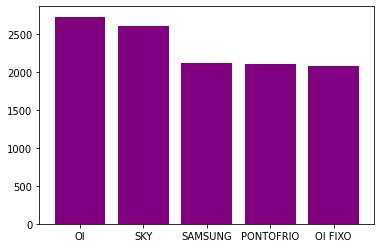

In [22]:
# visualização em gráfico de barras
grupos = ['OI', 'SKY', 'SAMSUNG', 'PONTOFRIO', 'OI FIXO']
valores = [2732, 2615, 2127, 2106, 2080]
plt.bar(grupos, valores, color='purple')
plt.show()

### Faixa Etária Consumidor

Dentre as idades que mais registraram reclamações, a faixa etária predominante foi de **31 a 40 anos**, e a menos frequente de até **20 anos**.

In [23]:
coluna_idade = df['FaixaEtariaConsumidor']

In [24]:
coluna_idade.value_counts()

entre 31 a 40 anos    45422
entre 41 a 50 anos    37963
entre 21 a 30 anos    33237
entre 51 a 60 anos    31717
entre 61 a 70 anos    22660
Nao Informada         16790
mais de 70 anos       10893
até 20 anos            4804
Name: FaixaEtariaConsumidor, dtype: int64

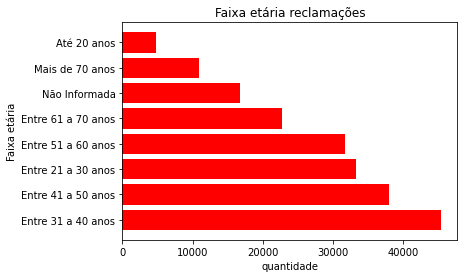

In [25]:
# definindo os valores de x e y manualmente
idade = ['Entre 31 a 40 anos', 'Entre 41 a 50 anos', 'Entre 21 a 30 anos', 'Entre 51 a 60 anos', 'Entre 61 a 70 anos',
         'Não Informada', 'Mais de 70 anos', 'Até 20 anos']
qtd = [45422, 37963, 33237, 31717, 22660, 16790, 10893, 4804]

# gráfico de barras
plt.barh(idade, qtd, color= 'red')

# labels do gráfico
plt.ylabel("Faixa etária")
plt.xlabel("quantidade")
plt.title("Faixa etária reclamações")

plt.show()

### Reclamações atendidas

As proporção de reclamações atendidas mostra que **120.575** reclamações foram atendidas e logo, **82.911 não** foram atendidas.

In [26]:
coluna_atend = df['Atendida']

In [27]:
coluna_atend.value_counts()

S    120575
N     82911
Name: Atendida, dtype: int64

Através da função `crosstab`é possível verificar quantas reclamções foram atendidas ou não atendidas em cada Região.

In [28]:
atend = pd.crosstab(df['Atendida'], df['Regiao'])

In [29]:
atend

Regiao,Centro-oeste,Nordeste,Norte,Sudeste,Sul
Atendida,,,,,
N,9566,25321,8835,29938,9251
S,19220,41090,10367,33036,16862


As regiões do **Sudeste e Norte** apresentam uma proporção **bem próxima** de reclamações atendidas e não atendidas, indicando uma má eficácia em seu serviço local.

As regiões do **Centro-oeste e Sul** demonstram serem mais eficazes que as demais tendo apenas uma menor fração de reclamações não atendidas.

Embora possa-se atrelar a má eficácia no atendimento a região do **Norte**, locais como **Nordeste e Sudeste** lidam com as maiores demandas do Brasil, portanto, outras variáveis como quantidade de colaboradores insuficiente deve ser obserevada.


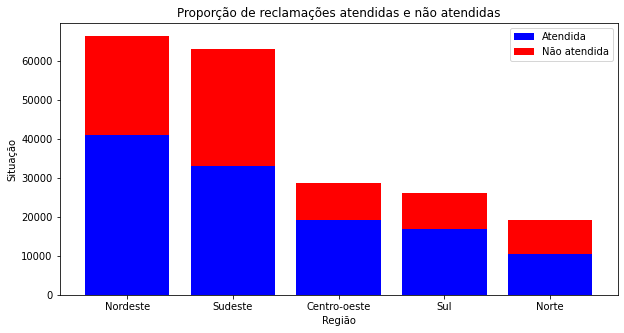

In [30]:
 
 
atendidas = np.array((41090, 33036, 19202, 16862, 10367 ))
n_atendidas = np.array((25321, 29938, 9566, 9251, 8835  ))
 
situacao = ['Atendidas', 'Não Atendidas']
regiao = ['Nordeste', 'Sudeste', 'Centro-oeste', 'Sul', 'Norte']
 
plt.figure(figsize=(10,5))
 
plt.bar(regiao, atendidas, color= 'blue')
plt.bar(regiao, n_atendidas, color= 'red', bottom = atendidas)
 
plt.xlabel('Região')
plt.ylabel('Situação')
plt.title('Proporção de reclamações atendidas e não atendidas')
plt.legend(('Atendida', 'Não atendida'))
 
plt.show()